In [28]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import soundfile as sf
import librosa 

%load_ext autoreload
%autoreload 2

import audio_transport as ap
from audio_transport.gen_utils import gen_sinewave, gen_gaussian, normalize
from audio_transport.spec_utils import stft
from audio_transport.plot_utils import plot_spectogram, plot_progression
from audio_transport.transport_utils import compute_optimal_map, compute_optimal_map_lp
from audio_transport.transport_utils import optimal_1d_mapping, interpolate, join_stfts, transport
import cvxpy as cp

import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


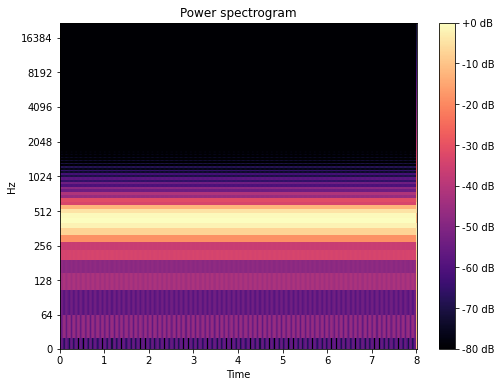

In [61]:
x1 = gen_sinewave(1760, 4, 44100) * 0.2 
x2 = gen_sinewave(440, 4, 44100) * 0.2

s1, S_db1 = stft(x1)
s2, S_db2 = stft(x2)

plot_spectogram(s2)

(513, 330) (513, 122) (513, 122)
106.25411876052479 1.0323287976674667
106.39873165392804 1.0312627379346568


/home/bernardotorres/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/bernardotorres/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/bernardotorres/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


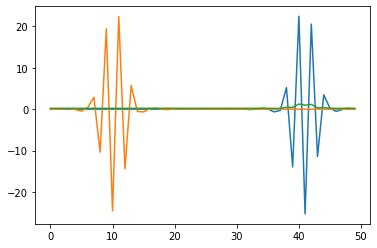

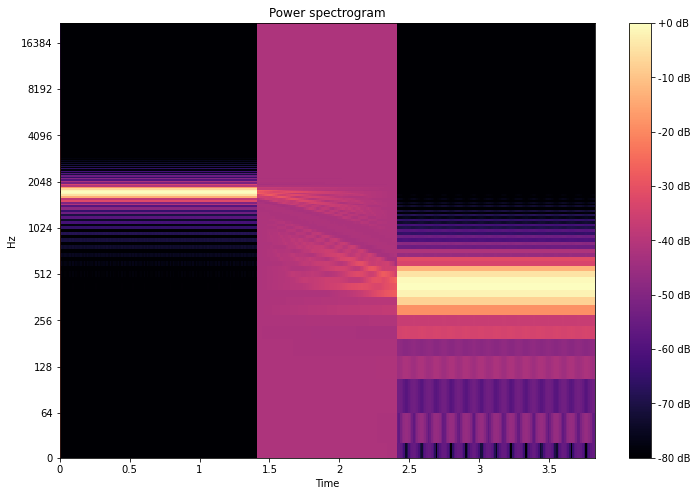

In [89]:
transport(x1, x2, 2, 2, 1, 44100, plot=3, write_file='test.wav')

a
a


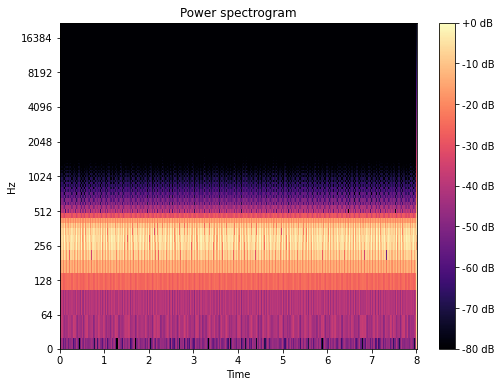

In [39]:
x1 = gen_sinewave([261.63, 293.66, 329.63],  4, 44100) * 0.2 
x2 = gen_sinewave(440, 4, 44100) * 0.2

s1, S_db1 = stft(x1)
s2, S_db2 = stft(x2)

plot_spectogram(s1)

(513, 502) (513, 294) (513, 122)
116.63846353609263 1.0328213961957655
106.39873165392804 1.0312627379346568


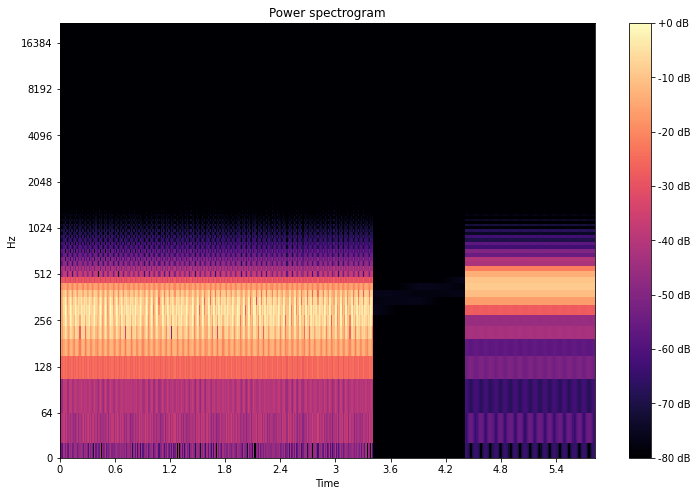

In [55]:
transport(x1, x2, 4, 2, 1, 44100, plot=3, write_file='test.wav')

In [43]:

audio, sr = librosa.load("audio_samples/square-chords_140bpm_A_minor.wav", sr=44100)
audio2, sr2 = librosa.load("audio_samples/rhodes-piano-chords_125bpm_G_minor.wav", sr=44100)

(513, 760) (513, 294) (513, 294)
<ufunc 'absolute'> <ufunc 'absolute'>
<ufunc 'absolute'> <ufunc 'absolute'>


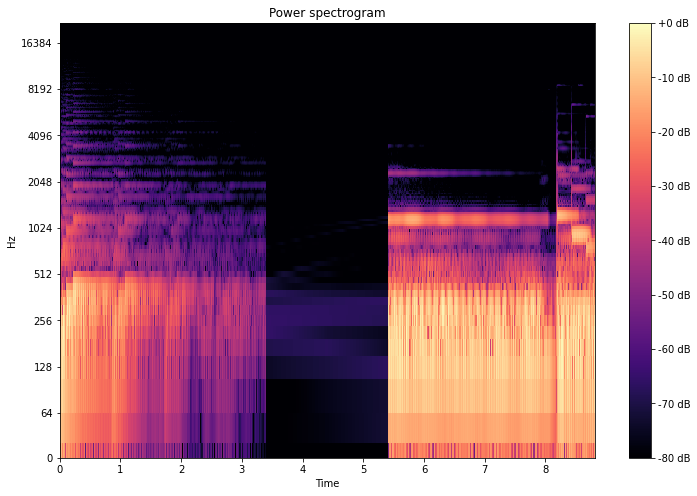

In [48]:
transport(audio, audio2, 4, 4, 2, 44100, plot=3, write_file='test.wav')

In [ ]:
plt.plot(audio)
begin = 110000
end = 150000
extract = audio[begin:end]
plt.plot(np.arange(begin, end), extract)
sf.write('extract2.wav', extract, 44100)

In [ ]:
plt.plot(audio)
plt.plot(audio2)

In [ ]:
s1, S_db1 = stft(audio)
plot_spectogram(s1)

In [ ]:
s2, S_db2 = stft(audio2)
plot_spectogram(s2)

In [ ]:
plt.plot(S_db1[:, -20])
plt.plot(S_db2[:, 20])
plt.figure()
plot_progression(S_db1[:, -1], S_db2[:, 0])

In [ ]:
new_D = join_stfts(s1, s2, 80)
plot_spectogram(new_D[:])

In [ ]:
plt.plot(s1[:20, -1])
plt.plot(s2[:20, 0])
plt.plot(new_D[:20, s1.shape[1]+10])
#plt.plot(new_D[:20, s1.shape[1]+80])